In [33]:
import pandas as pd
df = pd.read_csv('LLDB-data.csv', sep='|', skiprows=1, index_col=0)

In [34]:
df.head()

,Occasion,Household,Week,Loyalty,Price,Feature,Display,Tide,Wisk,Era,Choice
0,1,9,11,0.00,4.67,0,0,1,0,0,1
1,1,9,11,0.62,4.98,0,0,0,1,0,0
2,1,9,11,0.31,5.38,0,0,0,0,1,0
3,1,9,11,0.00,4.98,0,0,0,0,0,0
4,2,9,29,0.00,4.67,0,0,1,0,0,0


In [35]:
# Create a new dataset about the customers (Household) with avg price (Price) of their purchases (Choice = 1)
# and the total number of purchases (Choice = 1) they made
df = df[df['Choice'] == 1]
customer = df.groupby('Household').agg({'Price': 'mean', 'Choice': 'count'})

In [36]:
customer.rename(columns={'Price': 'AvgPrice', 'Choice': 'TotalPurchases'}, inplace=True)

In [37]:
customer.head()

,AvgPrice,TotalPurchases
Household,,
9,4.591429,7
11,5.170000,5
12,6.116250,8
15,4.538333,6
16,4.216000,5


In [38]:
customer['Freq'] = customer['TotalPurchases'] / df['Week'].nunique()

In [39]:
customer.head()

,AvgPrice,TotalPurchases,Freq
Household,,,
9,4.591429,7,0.134615
11,5.170000,5,0.096154
12,6.116250,8,0.153846
15,4.538333,6,0.115385
16,4.216000,5,0.096154


In [40]:
#tot_spent = df.groupby('Household').agg({'Price': 'sum'})
#customer = customer.join(tot_spent)
#customer.rename(columns={'Price': 'TotalSpent'}, inplace=True)
#customer.head()

In [41]:
zero = df[(df['Tide'] == 0) & (df['Wisk'] == 0) & (df['Era'] == 0)]
# Create a new column “Brand”
df['Brand'] = df[['Tide', 'Wisk', 'Era']].idxmax(axis=1) #.map({'Tide': 1, 'Wisk': 2, 'Era': 3}) remove comment to assign 1, 2, 3
# Assign "Surf" to the rows with all 0
df.loc[zero.index, 'Brand'] = "Surf" # 4
# Drop the columns Tide, Wisk, Era
df.drop(['Tide', 'Wisk', 'Era'], axis=1, inplace=True)

In [42]:
df.head()

,Occasion,Household,Week,Loyalty,Price,Feature,Display,Choice,Brand
0,1,9,11,0.00,4.67,0,0,1,Tide
5,2,9,29,0.62,4.67,1,0,1,Wisk
9,3,9,31,0.62,4.98,0,0,1,Wisk
13,4,9,43,0.62,3.81,0,0,1,Wisk
17,5,9,45,0.62,4.67,0,0,1,Wisk


In [43]:
# Count for heach houshold the number of purchases for each brand
brand_count = df.groupby(['Household', 'Brand']).agg({'Choice': 'count'}).unstack().fillna(0)

In [44]:
brand_count.head()

Choice               
Brand        Era Surf Tide Wisk
Household                      
9            0.0  0.0  1.0  6.0
11           0.0  0.0  4.0  1.0
12           8.0  0.0  0.0  0.0
15           0.0  0.0  0.0  6.0
16           0.0  1.0  0.0  4.0

In [45]:
# Rename the columns
brand_count.columns = brand_count.columns.droplevel()
brand_count.columns.name = None
brand_count.columns = ['Era', 'Surf', 'Tide', 'Wisk']
brand_count.head()

,Era,Surf,Tide,Wisk
Household,,,,
9,0.0,0.0,1.0,6.0
11,0.0,0.0,4.0,1.0
12,8.0,0.0,0.0,0.0
15,0.0,0.0,0.0,6.0
16,0.0,1.0,0.0,4.0


In [46]:
customer = customer.join(brand_count)

In [47]:
customer.head()

,AvgPrice,TotalPurchases,Freq,Era,Surf,Tide,Wisk
Household,,,,,,,
9,4.591429,7,0.134615,0.0,0.0,1.0,6.0
11,5.170000,5,0.096154,0.0,0.0,4.0,1.0
12,6.116250,8,0.153846,8.0,0.0,0.0,0.0
15,4.538333,6,0.115385,0.0,0.0,0.0,6.0
16,4.216000,5,0.096154,0.0,1.0,0.0,4.0


In [48]:
# Number of display and feature promotions
display = df.groupby('Household').agg({'Display': 'sum', 'Feature': 'sum'})
customer = customer.join(display)
customer.head()

,AvgPrice,TotalPurchases,Freq,Era,Surf,Tide,Wisk,Display,Feature
Household,,,,,,,,,
9,4.591429,7,0.134615,0.0,0.0,1.0,6.0,0,1
11,5.170000,5,0.096154,0.0,0.0,4.0,1.0,2,0
12,6.116250,8,0.153846,8.0,0.0,0.0,0.0,1,0
15,4.538333,6,0.115385,0.0,0.0,0.0,6.0,0,2
16,4.216000,5,0.096154,0.0,1.0,0.0,4.0,2,1


In [49]:
# Transform Era, Surf, Tide, Wisk, Display, Feature percentages
cols = ['Era', 'Surf', 'Tide', 'Wisk', 'Display', 'Feature']
for col in cols:
    customer[col] = round(customer[col] / customer['TotalPurchases'],2) * 100

customer.head()

,AvgPrice,TotalPurchases,Freq,Era,Surf,Tide,Wisk,Display,Feature
Household,,,,,,,,,
9,4.591429,7,0.134615,0.0,0.0,14.0,86.0,0.0,14.0
11,5.170000,5,0.096154,0.0,0.0,80.0,20.0,40.0,0.0
12,6.116250,8,0.153846,100.0,0.0,0.0,0.0,12.0,0.0
15,4.538333,6,0.115385,0.0,0.0,0.0,100.0,0.0,33.0
16,4.216000,5,0.096154,0.0,20.0,0.0,80.0,40.0,20.0


In [50]:
min_loyalty = df.groupby('Household').agg({'Loyalty': 'min'})
min_loyalty.rename(columns={'Loyalty': 'MinLoyalty'}, inplace=True)
max_loyalty = df.groupby('Household').agg({'Loyalty': 'max'})
max_loyalty.rename(columns={'Loyalty': 'MaxLoyalty'}, inplace=True)
customer = customer.join(min_loyalty)
customer = customer.join(max_loyalty)
customer.head()

,AvgPrice,TotalPurchases,Freq,Era,Surf,Tide,Wisk,Display,Feature,MinLoyalty,MaxLoyalty
Household,,,,,,,,,,,
9,4.591429,7,0.134615,0.0,0.0,14.0,86.0,0.0,14.0,0.00,0.62
11,5.170000,5,0.096154,0.0,0.0,80.0,20.0,40.0,0.0,0.33,0.50
12,6.116250,8,0.153846,100.0,0.0,0.0,0.0,12.0,0.0,0.86,0.86
15,4.538333,6,0.115385,0.0,0.0,0.0,100.0,0.0,33.0,1.00,1.00
16,4.216000,5,0.096154,0.0,20.0,0.0,80.0,40.0,20.0,0.14,0.18


In [51]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
def elbow(X):
    inertia = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    plt.plot(range(1, 11), inertia)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

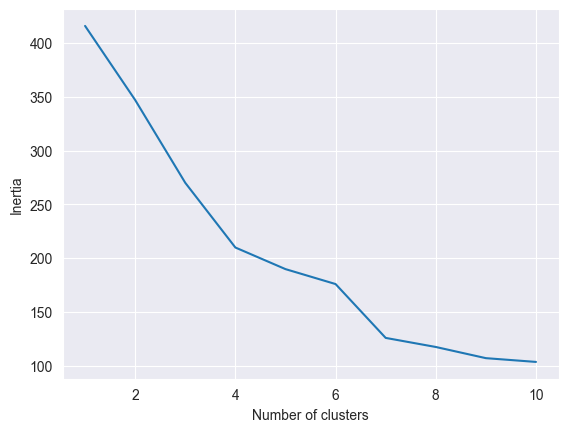

In [52]:
# kmeans clustering
"""import warnings
warnings.filterwarnings("ignore")   
scaler = StandardScaler()
X = customer.drop(['TotalPurchases', 'MinLoyalty', 'MaxLoyalty'], axis=1)
X = scaler.fit_transform(X)
elbow(X)"""

In [53]:
"""kmeans = KMeans(n_clusters=5, random_state=123)
customer['Cluster'] = kmeans.fit_predict(X)
customer.head()"""

"kmeans = KMeans(n_clusters=5, random_state=123)\ncustomer['Cluster'] = kmeans.fit_predict(X)\ncustomer.head()"

In [54]:
# Cluster analysis
"""cluster_analysis = customer.groupby('Cluster').agg({'AvgPrice': 'mean', 'TotalPurchases': 'mean', 'Freq': 'mean', 'Display': 'mean', 'Feature': 'mean', 'Era': 'mean', 'Surf': 'mean', 'Tide': 'mean', 'Wisk': 'mean', 'MinLoyalty': 'mean', 'MaxLoyalty': 'mean'})
cluster_analysis.head()"""

"cluster_analysis = customer.groupby('Cluster').agg({'AvgPrice': 'mean', 'TotalPurchases': 'mean', 'Freq': 'mean', 'Display': 'mean', 'Feature': 'mean', 'Era': 'mean', 'Surf': 'mean', 'Tide': 'mean', 'Wisk': 'mean', 'MinLoyalty': 'mean', 'MaxLoyalty': 'mean'})\ncluster_analysis.head()"

In [55]:
"""customer_without_brand = customer.drop(['Era', 'Surf', 'Tide', 'Wisk'], axis=1)
# cluster again without brand
X = customer_without_brand.drop(['TotalPurchases', 'MinLoyalty', 'MaxLoyalty'], axis=1)
X = scaler.fit_transform(X)
#elbow method
elbow(X)"""

"customer_without_brand = customer.drop(['Era', 'Surf', 'Tide', 'Wisk'], axis=1)\n# cluster again without brand\nX = customer_without_brand.drop(['TotalPurchases', 'MinLoyalty', 'MaxLoyalty'], axis=1)\nX = scaler.fit_transform(X)\n#elbow method\nelbow(X)"

In [56]:
# Cluster analysis without brand
"""kmeans = KMeans(n_clusters=5, random_state=123)
customer_without_brand['Cluster'] = kmeans.fit_predict(X)
customer_without_brand.head()
cluster_analysis = customer_without_brand.groupby('Cluster').agg({'AvgPrice': 'mean', 'TotalPurchases': 'mean', 'Freq': 'mean', 'Display': 'mean', 'Feature': 'mean', 'MinLoyalty': 'mean', 'MaxLoyalty': 'mean'})
cluster_analysis.head()"""

"kmeans = KMeans(n_clusters=5, random_state=123)\ncustomer_without_brand['Cluster'] = kmeans.fit_predict(X)\ncustomer_without_brand.head()\ncluster_analysis = customer_without_brand.groupby('Cluster').agg({'AvgPrice': 'mean', 'TotalPurchases': 'mean', 'Freq': 'mean', 'Display': 'mean', 'Feature': 'mean', 'MinLoyalty': 'mean', 'MaxLoyalty': 'mean'})\ncluster_analysis.head()"

In [57]:
df.head()

,Occasion,Household,Week,Loyalty,Price,Feature,Display,Choice,Brand
0,1,9,11,0.00,4.67,0,0,1,Tide
5,2,9,29,0.62,4.67,1,0,1,Wisk
9,3,9,31,0.62,4.98,0,0,1,Wisk
13,4,9,43,0.62,3.81,0,0,1,Wisk
17,5,9,45,0.62,4.67,0,0,1,Wisk


In [58]:
# How many a household bought a brand after buying another brand
# sort by week
df.sort_values(['Household', 'Week'], inplace=True)
for household in df['Household'].unique():
    prev_brand = df[(df['Household'] == household)].iloc[0]['Brand']
    count = 0
    for week in df[(df['Household'] == household)]['Week']:
        current_brand = df[(df['Household'] == household) & (df['Week'] == week)]['Brand'].values[0]
        if current_brand != prev_brand:
            count += 1
            prev_brand = current_brand
    customer.loc[household, 'BrandChange'] = count

customer.head()


,AvgPrice,TotalPurchases,Freq,Era,Surf,Tide,Wisk,Display,Feature,MinLoyalty,MaxLoyalty,BrandChange
Household,,,,,,,,,,,,
9,4.591429,7,0.134615,0.0,0.0,14.0,86.0,0.0,14.0,0.00,0.62,1.0
11,5.170000,5,0.096154,0.0,0.0,80.0,20.0,40.0,0.0,0.33,0.50,1.0
12,6.116250,8,0.153846,100.0,0.0,0.0,0.0,12.0,0.0,0.86,0.86,0.0
15,4.538333,6,0.115385,0.0,0.0,0.0,100.0,0.0,33.0,1.00,1.00,0.0
16,4.216000,5,0.096154,0.0,20.0,0.0,80.0,40.0,20.0,0.14,0.18,2.0


In [68]:
customer_with_changes= customer.drop(['Era', 'Surf', 'Tide', 'Wisk', 'TotalPurchases', 'Display', 'Feature', 'MinLoyalty', 'MaxLoyalty'], axis=1)
customer_with_changes.head()

,AvgPrice,Freq,BrandChange
Household,,,
9,4.591429,0.134615,1.0
11,5.170000,0.096154,1.0
12,6.116250,0.153846,0.0
15,4.538333,0.115385,0.0
16,4.216000,0.096154,2.0


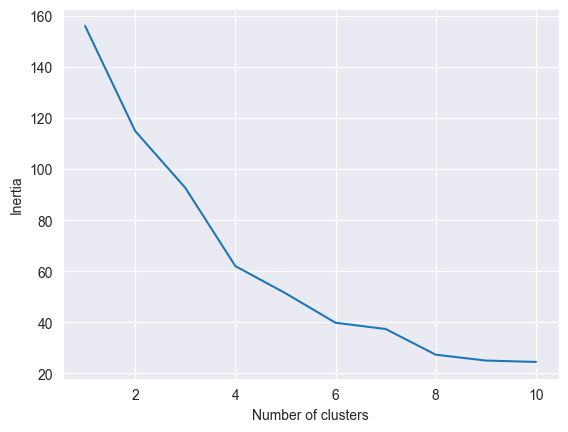

In [69]:
# cluster again without brand
X = customer_with_changes 
X = scaler.fit_transform(X)
#elbow method
elbow(X)

In [70]:

kmeans = KMeans(n_clusters=4, random_state=123)
customer_with_changes['Cluster'] = kmeans.fit_predict(X)
customer_with_changes.head()
cluster_analysis = customer_with_changes.groupby('Cluster').agg({'AvgPrice': 'mean', 'Freq': 'mean', 'BrandChange': 'mean'})
cluster_analysis.head()

,AvgPrice,Freq,BrandChange
Cluster,,,
0,5.140145,0.186813,3.857143
1,4.643453,0.096154,1.681818
2,4.653079,0.176573,0.000000
3,5.614445,0.110577,0.583333


 0: Highest frequency, high price, highest brand change (most likely to change brand)
 1: Lowest frequency, lowest price (buy low price products)
 2: High frequency, low price, lowest brand change (most loyal, buy frequently, buy cheap)
 3: Low frequency, highest price, low brand change (loyal to high price products, buy less frequently)